In [10]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
#plt.gray()


uint8
(4032, 3024, 3)


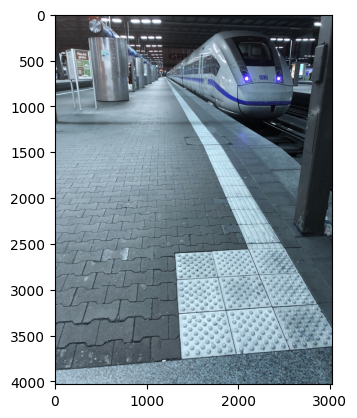

In [121]:
image_path = 'C:\\Users\\leonh\\Documents\\GitHub\\project_bums\\Test_Bilder\\MUC_BHF_3.jpg'
img = cv2.imread(image_path, )
plt.imshow(img)

print(img.dtype)
print(img.shape)

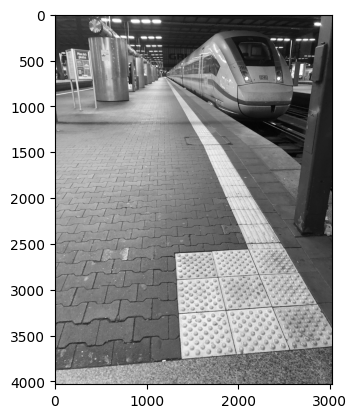

In [13]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image)

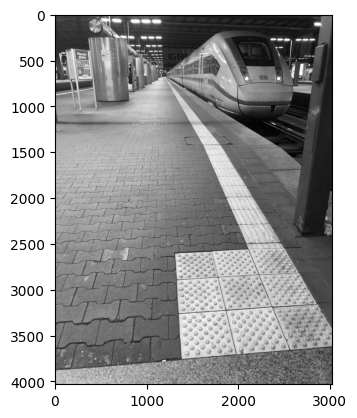

In [15]:
img_blur = cv2.GaussianBlur(gray_image, (5,5), 0)
plt.imshow(img_blur)



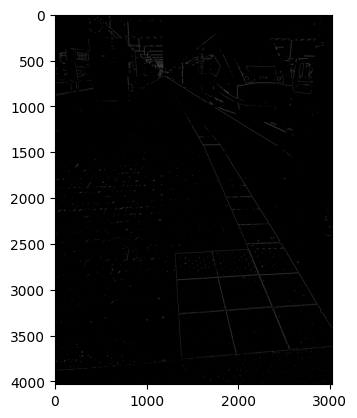

In [44]:
canny = cv2.Canny(img_blur, threshold1=255, threshold2=255)

plt.imshow(canny)

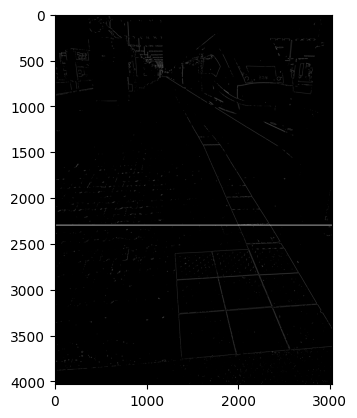

In [109]:
def create_horizontal_line(image, y_position, color=(255, 0, 0), thickness=5):
    line_image = np.array(image)
    cv2.line(line_image, (0, y_position), (image.shape[1], y_position), color, thickness)
    return line_image


y_position = 2300  # Y-Position der horizontalen Linie

line_image = create_horizontal_line(canny, y_position)

plt.imshow (line_image)

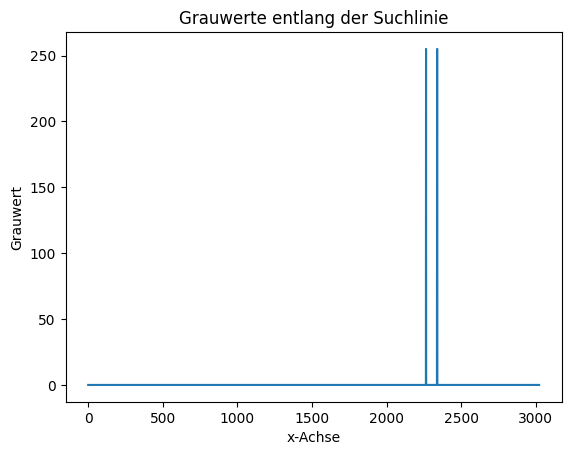

In [110]:
def grayscale_values(image, y_position):
    # Linienbild erstellen
    line_image = create_horizontal_line(image, y_position)

    # x-Achse und Grauwerte initialisieren
    x_values = np.arange(image.shape[1])
    gray_values = []

    # Grauwerte entlang der Linie sammeln
    for x in x_values:
        gray_values.append(image[y_position, x])

    return gray_values, x_values


# Plot erstellen
def plot_values (gray_values, x_values):
    plt.plot(x_values, gray_values)
    plt.title('Grauwerte entlang der Suchlinie')
    plt.xlabel('x-Achse')
    plt.ylabel('Grauwert')
    plt.show()

gray_values, x_values = grayscale_values(canny, y_position);
plot_values (gray_values, x_values)

Positionen der Änderungen:  [[(1877, 2000), (2149, 2000)], [(190, 2001), (1877, 2001), (2150, 2001)], [(534, 2002), (1878, 2002), (2151, 2002)], [], [], [(197, 2005), (2139, 2005)], [(196, 2006), (1865, 2006), (2140, 2006)], [(1865, 2007), (2154, 2007)], [(1864, 2008), (2155, 2008)], [(1865, 2009), (2155, 2009)], [(1865, 2010), (2156, 2010)], [(1497, 2011), (1865, 2011), (2156, 2011)], [(1866, 2012), (2156, 2012)], [(1469, 2013), (1866, 2013), (2157, 2013)], [(1460, 2014), (1867, 2014), (2158, 2014)], [(1345, 2015), (1868, 2015), (2159, 2015)], [(1342, 2016), (1868, 2016), (2160, 2016)], [(1463, 2017), (1868, 2017), (2160, 2017)], [(1462, 2018), (1869, 2018), (2161, 2018)], [(1442, 2019), (1869, 2019), (2162, 2019)], [(1266, 2020), (1870, 2020), (2163, 2020)], [(1310, 2021), (1870, 2021), (2163, 2021)], [(818, 2022), (1269, 2022), (1870, 2022), (2164, 2022)], [(1260, 2023), (1716, 2023), (1870, 2023), (2164, 2023)], [(1266, 2024), (1443, 2024), (1871, 2024), (2165, 2024)], [(1263, 2025

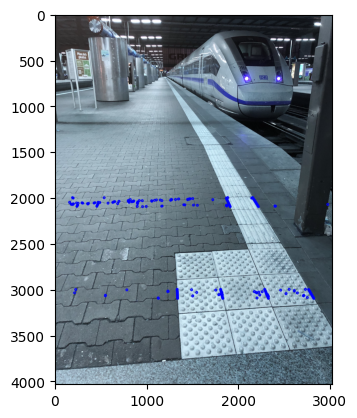

In [124]:

def detect_gray_value_changes(image, image_to_draw, y_position, min_distance, max_distance):
    
    # x-Achse und Grauwerte initialisieren
    x_values = np.arange(image.shape[1])
    gray_values = []

    # Grauwerte entlang der Linie sammeln
    for x in x_values:
        gray_values.append(image[y_position, x])

    # Grauwertänderungen und zugehörige x-Positionen sammeln
    change_positions_inrange = []
    change_positions = []
    #prev_value = gray_values[0]
    prev_position = 0

    for i in range(1, len(gray_values)):
        current_value = int(gray_values[i])
        if current_value == 255:
            if (i - prev_position) < max_distance:  #min_distance <
                change_positions_inrange.append((prev_position, y_position))
                change_positions_inrange.append((i, y_position))

            #change_positions.append((i, y_position))
            #prev_value = current_value
            prev_position = i  

    change_positions_sub =  tuple(set(change_positions_inrange))
    change_positions_sub = sorted(change_positions_sub, key=lambda point: point[0])

    # Nun nahe beiananderliegenede Punkte aus changes_position entfernen
    change_positions_final = []
    prev_x = 0
    for p in range(len(change_positions_sub)):
        current_x = change_positions_sub[p][0]
        current_y = change_positions_sub[p][1]
        
        if (current_x-prev_x) > min_distance:
            change_positions_final.append((current_x, current_y))

        prev_x = current_x

    #Makiere die zulässigen Grauwertänderungen im ausgabe Bild
    img_out = image_to_draw
    for position in change_positions_final:
        cv2.circle(img_out, position, 10, (0, 0, 255), 10)

    return change_positions_final, img_out


#y_position = 2400
y_start = 2000
y_end = 2100
change_positions = []

img_dots = np.zeros(img.shape)

for y in range(y_start, y_end):
#Nach Grauwertänderungen suchen die sich in Ihrer x-Koordinate in einem Abstand 
# von 200 bis 350 Pixel befinden
    change_positions_current, img_dots = detect_gray_value_changes(canny, img, y, 150, 500)
    change_positions.append(change_positions_current)
    

print("Positionen der Änderungen: ", change_positions)
plt.imshow(img_dots)


[1.6233766233766234, 1.6611295681063123]
[-1404.2207792207791, -1573.089700996678]


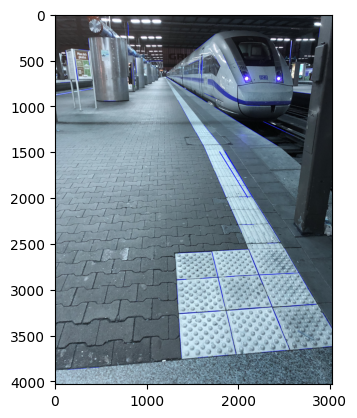

In [75]:
m = []
c = []
for i in range(2):
    out=cv2.line(img, change_positions1[-i], change_positions2[-i], (0, 0, 255), 6)

    #Steigung berechnen
    m.append((change_positions1[i][1]-change_positions2[i][1])/(change_positions1[i][0]-change_positions2[i][0]))
    #y-Schnittpunkt berechnen
    c.append(change_positions1[i][1] -m[i]*change_positions1[i][0])

    # Gerade1: y1 = m[0]*x1 + c[0]
    # Gerade2: y2 = m[1]*x2 + c[1]

print(m)
print(c)
plt.imshow(out)

In [9]:
def set_pixel_to_black(image, x, y):
    image[y, x] = np.zeros(3, dtype='uint8')  # Setze den Pixel auf Schwarz

    return image

set_pixel_to_black(img, 100, 100)

ValueError: setting an array element with a sequence.

In [ ]:
def set_pixels_to_zero(image, slope_left, intercept_left, slope_right, intercept_right, offset=50):
    height, width = image.shape
    
    for y in range(height):
        for x in range(width):
            if y <= (slope_left * x + intercept_left)-offset and y >= (slope_right * x + intercept_right)+offset:
                image[y, x] = [0, 0, 0]  # Setze den Pixel auf Schwarz
    
    return image

blacken_img = set_pixels_to_zero(img, m[0], c[0], m[1], c[1])

plt.imshow(blacken_img)

ValueError: setting an array element with a sequence.